# Confidence Intervals for Pearson’s Correlation ( $\chi^2$)

In [0]:
import numpy as np
import pandas as pd

from scipy import stats

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Exhausted fertility

Exhausted fertility - the number of children born to a woman at the end of the conventional reproductive age (45 years). For 1878 women over 45 who participated in a sociological survey of Swiss residents, the number of children is known. This feature is a typical counter, which means that you can try to describe it by the Poisson distribution.

* **sample** is an integer vector of length $ n $ that characterizes the number of children in the interviewed woman
* **hypothesis $ H_0 $** - the quantity in question has a Poisson distribution

In [0]:
fin = pd.read_csv('https://raw.githubusercontent.com/OzmundSedler/100-Days-Of-ML-Code/master/week_10/datasets/fertility.txt', 'r').iloc[:,0]
data = list(fin)

In [4]:
data[:20]

[0, 2, 0, 2, 3, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 3, 2, 2, 4, 3]

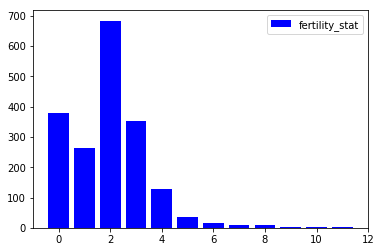

In [5]:
pylab.bar(range(12), np.bincount(data), color = 'b', label = 'fertility_stat')
pylab.legend()

In [6]:
l = np.mean(data)
l

1.9381992541289292

## Pearson's correlation

In [7]:
observed_frequences = np.bincount(data)
observed_frequences

array([378, 262, 684, 353, 128,  35,  16,   8,  10,   1,   1,   1])

In [8]:
expected_frequences = [len(data)*stats.poisson.pmf(x, l) for x in range(min(data), max(data) + 1)]
expected_frequences

[270.2184706741783,
 523.7372383125523,
 507.55356232846714,
 327.9133119785053,
 158.89033417392147,
 61.59222543683817,
 19.89633423363676,
 5.50900859593352,
 1.3346945439535256,
 0.28743377439785334,
 0.05571039271493817,
 0.009816167418847534]

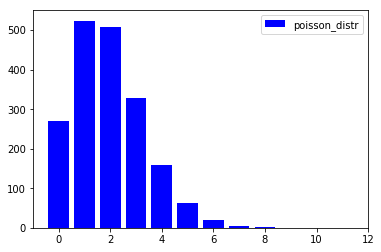

In [9]:
pylab.bar(range(len(expected_frequences)), expected_frequences, color = 'b', label = 'poisson_distr')
pylab.legend()

$$\chi^2=\sum_{i=1}^K \frac{\left(n_i- np_i\right)^2}{np_i}$$
If the null hypothesis is true, it has a chi-square distribution with the number of degrees of freedom $ K-1-m $, where $ m $ is the number of distribution parameters estimated from the sample.

In [10]:
stats.chisquare(observed_frequences, expected_frequences, ddof = 1)

Power_divergenceResult(statistic=430.3417297879709, pvalue=3.2472386956664576e-86)